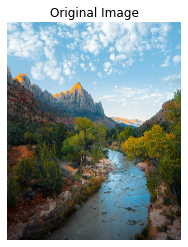

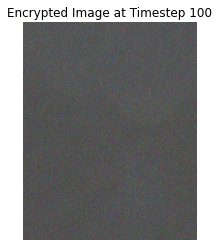

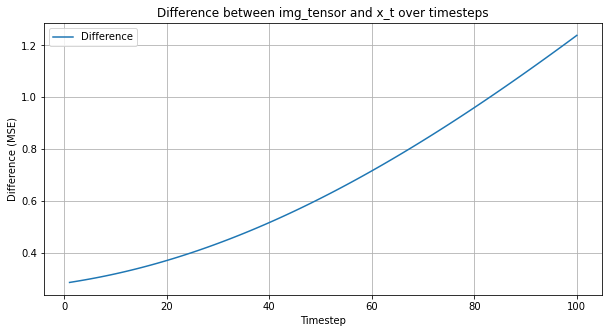

In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from PIL import Image

beta1 = 0.0001  
beta2 = 0.02 
timesteps = 500

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

b_t = (beta2 - beta1) * torch.linspace(0, 1, timesteps + 1, device=device) + beta1
#b_t = torch.full((timesteps + 1,), 0.02, device=device)
a_t = 1 - b_t
ab_t = torch.cumsum(a_t.log(), dim=0).exp().to(device)  # Move ab_t to the same device
ab_t[0] = 1.0  # Ensure the initial value is 1.0 (100% of the original image)

image_path = 'pexels-michael-block-1691617-3225517.jpg'  # Replace with your image path
img = Image.open(image_path)  
img = img.convert('RGB')  
img_array = np.array(img)
img_array = img_array / 255.0  # Normalize to [0, 1]
img_tensor = torch.tensor(img_array, dtype=torch.float32, device=device).permute(2, 0, 1).unsqueeze(0)  # Convert to tensor and add batch dimension, move to device

plt.imshow(np.clip(img_array, 0, 1))  # Ensure values are in [0, 1]
plt.title(f"Original Image")
plt.axis('off')
plt.show()

noise = torch.randn_like(img_tensor, device=device)
encrypted_image = ab_t.sqrt()[timesteps, None, None, None] * img_tensor + (1 - ab_t[timesteps, None, None, None]).sqrt() * noise

encrypted_image = encrypted_image.squeeze().permute(1, 2, 0).cpu().numpy()  # Convert back to HWC format for visualization

plt.imshow(np.clip(encrypted_image, 0, 1))  # Ensure values are in [0, 1]
plt.title(f"Encrypted Image at Timestep {100}")
plt.axis('off')
plt.savefig('encrypted_image.png')  # Save the image
plt.show()

differences = []
x_t = torch.tensor(encrypted_image.copy(), dtype=torch.float32, device=device).permute(2, 0, 1).unsqueeze(0)

for t in range(100, -1, -1):
    x_t_minus_1 = (x_t - ((1 - a_t[t])/torch.sqrt(1-ab_t[t])) * noise) / torch.sqrt(a_t[t])
    x_t = x_t_minus_1

    decrypted_image = x_t.squeeze().permute(1, 2, 0).cpu().numpy()
    '''plt.imshow(np.clip(decrypted_image, 0, 1))  # Ensure values are in [0, 1]
    plt.title(f"Decrypted Image at Timestep {t}")
    plt.axis('off')
    plt.show() '''

    difference = torch.mean((img_tensor - x_t) ** 2).item()  # Mean squared error
    differences.append(difference)

# Plot the differences
plt.figure(figsize=(10, 5))
plt.plot(range(100, -1, -1), differences, label='Difference')
plt.xlabel('Timestep')
plt.ylabel('Difference (MSE)')
plt.title('Difference between img_tensor and x_t over timesteps')
plt.legend()
plt.grid(True)
plt.show()

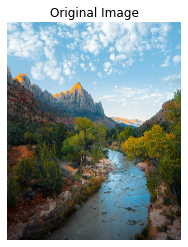

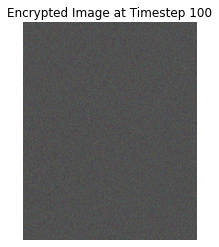

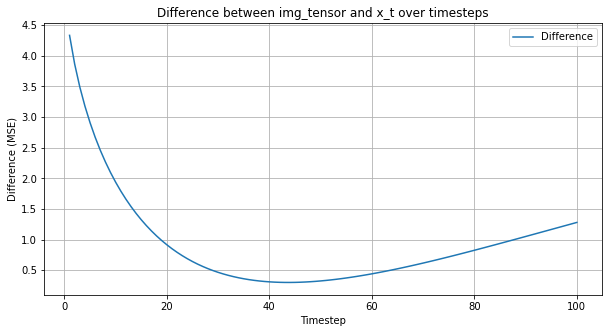

In [4]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from PIL import Image

beta1 = 0.0001  
beta2 = 0.02 
timesteps = 500

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#b_t = (beta2 - beta1) * torch.linspace(0, 1, timesteps + 1, device=device) + beta1
b_t = torch.full((timesteps + 1,), 0.02, device=device)
a_t = 1 - b_t
ab_t = torch.cumsum(a_t.log(), dim=0).exp().to(device)  # Move ab_t to the same device
ab_t[0] = 1.0  # Ensure the initial value is 1.0 (100% of the original image)

image_path = 'pexels-michael-block-1691617-3225517.jpg'  # Replace with your image path
img = Image.open(image_path)  
img = img.convert('RGB')  
img_array = np.array(img)
img_array = img_array / 255.0  # Normalize to [0, 1]
img_tensor = torch.tensor(img_array, dtype=torch.float32, device=device).permute(2, 0, 1).unsqueeze(0)  # Convert to tensor and add batch dimension, move to device

plt.imshow(np.clip(img_array, 0, 1))  # Ensure values are in [0, 1]
plt.title(f"Original Image")
plt.axis('off')
plt.show()

noise = torch.randn_like(img_tensor, device=device)
encrypted_image = ab_t.sqrt()[timesteps, None, None, None] * img_tensor + (1 - ab_t[timesteps, None, None, None]).sqrt() * noise

encrypted_image = encrypted_image.squeeze().permute(1, 2, 0).cpu().numpy()  # Convert back to HWC format for visualization

plt.imshow(np.clip(encrypted_image, 0, 1))  # Ensure values are in [0, 1]
plt.title(f"Encrypted Image at Timestep {100}")
plt.axis('off')
plt.savefig('encrypted_image.png')  # Save the image
plt.show()

differences = []
x_t = torch.tensor(encrypted_image.copy(), dtype=torch.float32, device=device).permute(2, 0, 1).unsqueeze(0)

for t in range(100, -1, -1):
    x_t_minus_1 = (x_t - ((1 - a_t[t])/torch.sqrt(1-ab_t[t])) * noise) / torch.sqrt(a_t[t])
    x_t = x_t_minus_1

    decrypted_image = x_t.squeeze().permute(1, 2, 0).cpu().numpy()
    '''plt.imshow(np.clip(decrypted_image, 0, 1))  # Ensure values are in [0, 1]
    plt.title(f"Decrypted Image at Timestep {t}")
    plt.axis('off')
    plt.show() '''

    difference = torch.mean((img_tensor - x_t) ** 2).item()  # Mean squared error
    differences.append(difference)

# Plot the differences
plt.figure(figsize=(10, 5))
plt.plot(range(100, -1, -1), differences, label='Difference')
plt.xlabel('Timestep')
plt.ylabel('Difference (MSE)')
plt.title('Difference between img_tensor and x_t over timesteps')
plt.legend()
plt.grid(True)
plt.show()

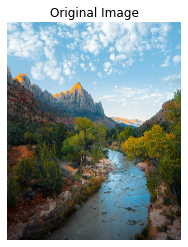

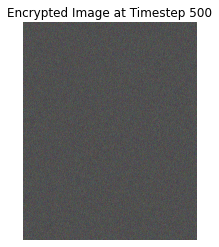

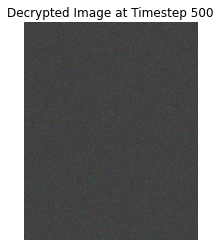

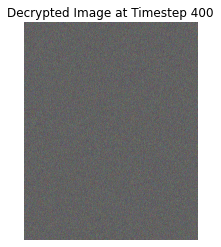

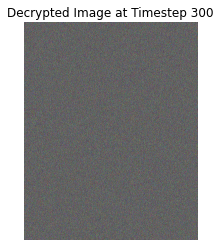

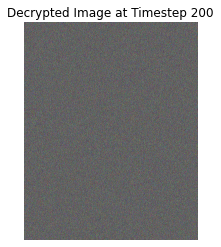

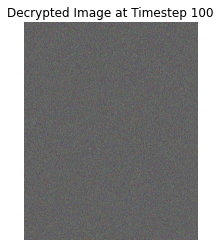

c:\Users\varun\anaconda3\lib\site-packages\matplotlib\cm.py:440: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


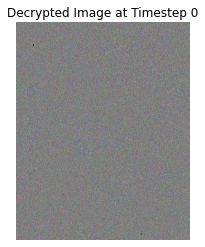

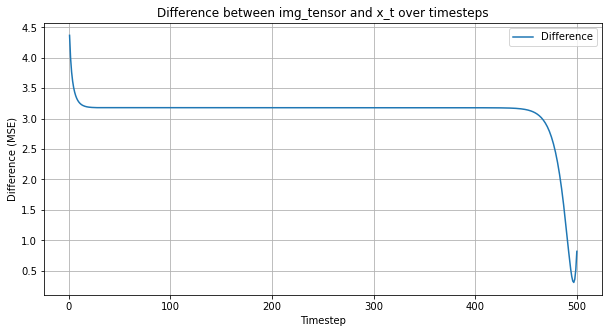

In [9]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from PIL import Image

# Constants
beta1 = 0.1  
beta2 = 0.2 
timesteps = 500

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Precompute coefficients
b_t = torch.full((timesteps + 1,), 0.2, device=device)  # betas
a_t = 1 - b_t  # alphas
ab_t = torch.cumsum(a_t.log(), dim=0).exp().to(device)  # cumulative product of alphas, move to device
ab_t[0] = 1.0  # Ensure the initial value is 1.0 (100% of the original image)

# Load and preprocess the image
image_path = 'pexels-michael-block-1691617-3225517.jpg'  # Replace with your image path
img = Image.open(image_path)  
img = img.convert('RGB')  
img_array = np.array(img)
img_array = img_array / 255.0  # Normalize to [0, 1]
img_tensor = torch.tensor(img_array, dtype=torch.float32, device=device).permute(2, 0, 1).unsqueeze(0)  # Convert to tensor, move to device

# Display the original image
plt.imshow(np.clip(img_array, 0, 1))  # Ensure values are in [0, 1]
plt.title(f"Original Image")
plt.axis('off')
plt.show()

# Create noise and encrypted image
noise = torch.randn_like(img_tensor, device=device)
encrypted_image = ab_t.sqrt()[timesteps, None, None, None] * img_tensor + (1 - ab_t[timesteps, None, None, None]).sqrt() * noise

# Convert encrypted image for visualization
encrypted_image_np = encrypted_image.squeeze().permute(1, 2, 0).cpu().numpy()  # Convert back to HWC format for visualization

# Display the encrypted image
plt.imshow(np.clip(encrypted_image_np, 0, 1))  # Ensure values are in [0, 1]
plt.title(f"Encrypted Image at Timestep {timesteps}")
plt.axis('off')
plt.savefig('encrypted_image.png')  # Save the image
plt.show()

# Initialize difference tracking and tensor for decryption
differences = []
x_t = encrypted_image.clone()

# Precompute values outside the loop
sqrt_a_t = torch.sqrt(a_t)
inv_sqrt_ab_t = 1 / torch.sqrt(1 - ab_t)

# Decryption loop
for t in range(timesteps, -1, -1):
    x_t_minus_1 = (x_t - ((1 - a_t[t]) * noise) * inv_sqrt_ab_t[t]) * sqrt_a_t[t]
    x_t = x_t_minus_1

    # Calculate and store the difference (MSE) without visualizing every timestep
    if t % 100 == 0:  # Visualize every 100 timesteps
        decrypted_image = x_t.squeeze().permute(1, 2, 0).cpu().numpy()
        plt.imshow(np.clip(decrypted_image, 0, 1))  # Ensure values are in [0, 1]
        plt.title(f"Decrypted Image at Timestep {t}")
        plt.axis('off')
        plt.show()
    
    difference = torch.mean((img_tensor - x_t) ** 2).item()  # Mean squared error
    differences.append(difference)

# Plot the differences
plt.figure(figsize=(10, 5))
plt.plot(range(timesteps, -1, -1), differences, label='Difference')
plt.xlabel('Timestep')
plt.ylabel('Difference (MSE)')
plt.title('Difference between img_tensor and x_t over timesteps')
plt.legend()
plt.grid(True)
plt.show()
